# Khushi Gatwar
# Roll No. DA25S004

# Importing Necessary Libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy for loading ARFF files
from scipy.io import arff

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap
from sklearn.neighbors import NearestNeighbors

sns.set_style("whitegrid")


# Part A: Preprocessing and Initial Setup 

In this section, we will load, inspect, and prepare the Yeast dataset. This involves loading the feature matrix (X) and the label matrix (Y), checking their dimensions, creating a simplified coloring scheme for visualization, and scaling the features, which is a critical step for distance-based algorithms.

## 1. Data Loading

In [170]:
data, meta = arff.loadarff('yeast.arff')

df = pd.DataFrame(data)

df.head()


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


Here, we load the  yeast.arff dataset. The loadarff function returns the data and metadata. We then convert the data into a pandas DataFrame to easily separate the features from the labels. The first 103 columns are the gene expression features (X), and the last 14 are the multi-label functional categories (Y).  We also ensure the data types are correct (float for features, int for labels).

In [171]:
df.info

<bound method DataFrame.info of           Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0     0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1    -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2     0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3     0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4     0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   
...        ...       ...       ...       ...       ...       ...       ...   
2412 -0.119784  0.001259 -0.123645 -0.015513 -0.059683  0.091032 -0.043302   
2413  0.085327  0.058590  0.085268 -0.020897  0.068972  0.030125  0.078056   
2414  0.082526 -0.095571 -0.022019 -0.046793 -0.038360  0.041084  0.056509   
2415 -0.130830  0.008868 -0.009457 -0.058930 -0.041224  0.042269  0.117717   
2416 -0.171578 -0.066536  0.168206  0.246831  0.079555  0.016528 -0.088908   

          Att8      Att9     At

In [172]:
feature_cols = df.columns[:103]
label_cols = df.columns[103:]

In [173]:
X = df[feature_cols].values.astype(float)
Y = df[label_cols].apply(pd.to_numeric).astype(int).values

### Null check

As a crucial data quality check, we will inspect the matrices for any null or missing values. This ensures our algorithms will run without errors and that our analysis is based on a complete dataset.

In [174]:
# Check for any null or missing values in our matrices
print(f"Missing values in feature matrix X: {np.isnan(X).sum()}")
print(f"Missing values in target matrix Y: {np.isnan(Y).sum()}")

Missing values in feature matrix X: 0
Missing values in target matrix Y: 0


The dataset is cleaned

## 2. Dimensionality Check

This step confirms the dimensions of our dataset. We report the number of data points (experiments), the initial number of features (gene expression levels), and the number of labels (functional categories).

In [175]:
print(f"Shape of feature matrix X: {X.shape}")
print(f"Shape of target matrix Y: {Y.shape}")
print(f"\nInitial number of features: {X.shape[1]}")
print(f"Number of data points (experiments): {X.shape[0]}")

Shape of feature matrix X: (2417, 103)
Shape of target matrix Y: (2417, 14)

Initial number of features: 103
Number of data points (experiments): 2417


The output confirms the structure of the Yeast dataset:

- Data Points: The dataset contains 2,417 individual data points, where each point represents a single gene expression experiment.

- Features: Each experiment is described by 103 features, which correspond to different gene expression levels. This high-dimensional space is what we aim to reduce and visualize.

- Labels: There are 14 possible binary labels for each data point. This confirms the multi-label nature of the classification problem, where each gene can be assigned to multiple functional categories simultaneously.

## 3. Label Selection for Visualization

The Yeast dataset has 14 binary labels, making it a multi-label classification problem. Visualizing all 14 labels simultaneously on a 2D plot would be chaotic and difficult to interpret. The objective of this step is to simplify the visualization by creating a new, single categorical variable with just four distinct groups. The original plan was to select the two most frequent single-label classes and the most frequent multi-label combination.


In [176]:
# First, find all unique label combinations in the dataset
y_tuples = [tuple(row) for row in Y]
unique_labels = list(set(y_tuples))

# Find all unique class combinations that are single-label (sum == 1)
unique_single_label_classes = [lbl for lbl in unique_labels if sum(lbl) == 1]
print("Unique single-label classes:", unique_single_label_classes)
print("Number of unique single-label classes:", len(unique_single_label_classes))

Unique single-label classes: [(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)]
Number of unique single-label classes: 1


In [177]:
# Find all unique multi-label classes (where sum of tuple > 1)
unique_multi_label_classes = [lbl for lbl in unique_labels if sum(lbl) > 1]
print("Unique multi-label classes:", unique_multi_label_classes)
print("Number of unique multi-label classes:", len(unique_multi_label_classes))

Unique multi-label classes: [(0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0), (1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0), (1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0), (1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0), (0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0), (0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0), (1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0), (0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0), (0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0), (0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0), (1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0), (0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0), (0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0), (0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0), (1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0), (1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0), (1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0), (0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0), (0,

In [178]:
# Get the frequency of each unique label combination
label_counts = pd.Series(y_tuples).value_counts()

# Identify the two most frequent single-label classes (where the sum of the tuple is 1)
single_label_counts = label_counts[label_counts.index.map(sum) == 1]
most_frequent_single_label = single_label_counts.index[0]
#most_frequent_single_label_2 = single_label_counts.index[1] --> index out of bound error (because only 1 single label class in yeast dataset)

# Find the two most frequent multi-label combinations (where the sum of the tuple is > 1)
multi_label_counts = label_counts[label_counts.index.map(sum) > 1]
most_frequent_multi_label_1 = multi_label_counts.index[0]
most_frequent_multi_label_2 = multi_label_counts.index[1]

Crucially, upon inspecting, we discovered that the dataset contains only one unique single-label class (a data point belonging to only one category). This made the original plan of selecting the two most frequent single-label classes impossible.



In [179]:
# This function creates our new, adapted category for each data point
def create_color_category(row_tuple):
    if row_tuple == most_frequent_single_label:
        return 'Top Single-Label'
    elif row_tuple == most_frequent_multi_label_1:
        return 'Top Multi-Label 1'
    elif row_tuple == most_frequent_multi_label_2:
        return 'Top Multi-Label 2'
    else:
        return 'Other' # All other combinations fall into this category

Therefore, the methodology was adapted to create a meaningful four-category scheme by selecting the following:

- The single most frequent single-label class.

- The most frequent multi-label combination.

- The second most frequent multi-label combination.

- All other 195 unique combinations were grouped into a single "Other" category.

In [180]:
# Apply the function to create the new target variable for our plots
color_labels = [create_color_category(t) for t in y_tuples]

print("Distribution of the new categories:")
print(pd.Series(color_labels).value_counts())

Distribution of the new categories:
Other                1915
Top Multi-Label 1     237
Top Multi-Label 2     233
Top Single-Label       32
Name: count, dtype: int64


This output shows that the vast majority of data points (1915) fall into the 'Other' category, representing a wide variety of less common label combinations. The two most frequent multi-label classes are very similar in frequency (237 and 233), while the only single-label class is significantly rarer (32). This new color_labels variable will now be used to color the points in our t-SNE and Isomap visualizations.

## 4. Scaling

Scaling the feature matrix is a critical preprocessing step before applying distance-based dimensionality reduction techniques like t-SNE and Isomap. These algorithms work by calculating the distances between data points in the high-dimensional feature space. If one feature has a much larger range of values than others (e.g., 0-1000 vs 0-1), its contribution will dominate the distance metric, causing the algorithm to effectively ignore the patterns in the smaller-scale features. 

**Standardization** resolves this by transforming all features to have a mean of 0 and a standard deviation of 1. This ensures that each feature contributes equally to the analysis, resulting in a more meaningful and accurate low-dimensional embedding of the data's true structure

In [181]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Part B: t-SNE and Veracity Inspection

In this section, we will apply t-Distributed Stochastic Neighbor Embedding (t-SNE), a powerful non-linear dimensionality reduction technique, to our 103-dimensional feature space. The goal is to create a 2D visualization that reveals the underlying structure of the data and helps us visually identify potential data quality issues like outliers and noisy labels. 





## 1. t-SNE Implementation

Before implementing t-SNE, it's important to understand its main hyperparameter: 

**perplexity**  The perplexity can be thought of as a guess about the number of close neighbors each data point has. It influences the balance between preserving the local (fine-grained) and global (broad) aspects of the data structure. 

- A low perplexity value makes the algorithm focus on a small number of neighbors, which can reveal tight local clusters but might also be sensitive to noise.

- A high perplexity value considers a larger neighborhood, giving more weight to the global structure but can risk merging distinct smaller clusters. 

As required, we will experiment with a few values (5,10,20,30,40,50 and 60) to observe how the visualization changes and to select the most informative one. 

Running t-SNE for perplexity=5
Running t-SNE for perplexity=10
Running t-SNE for perplexity=20
Running t-SNE for perplexity=30
Running t-SNE for perplexity=40
Running t-SNE for perplexity=50
Running t-SNE for perplexity=60


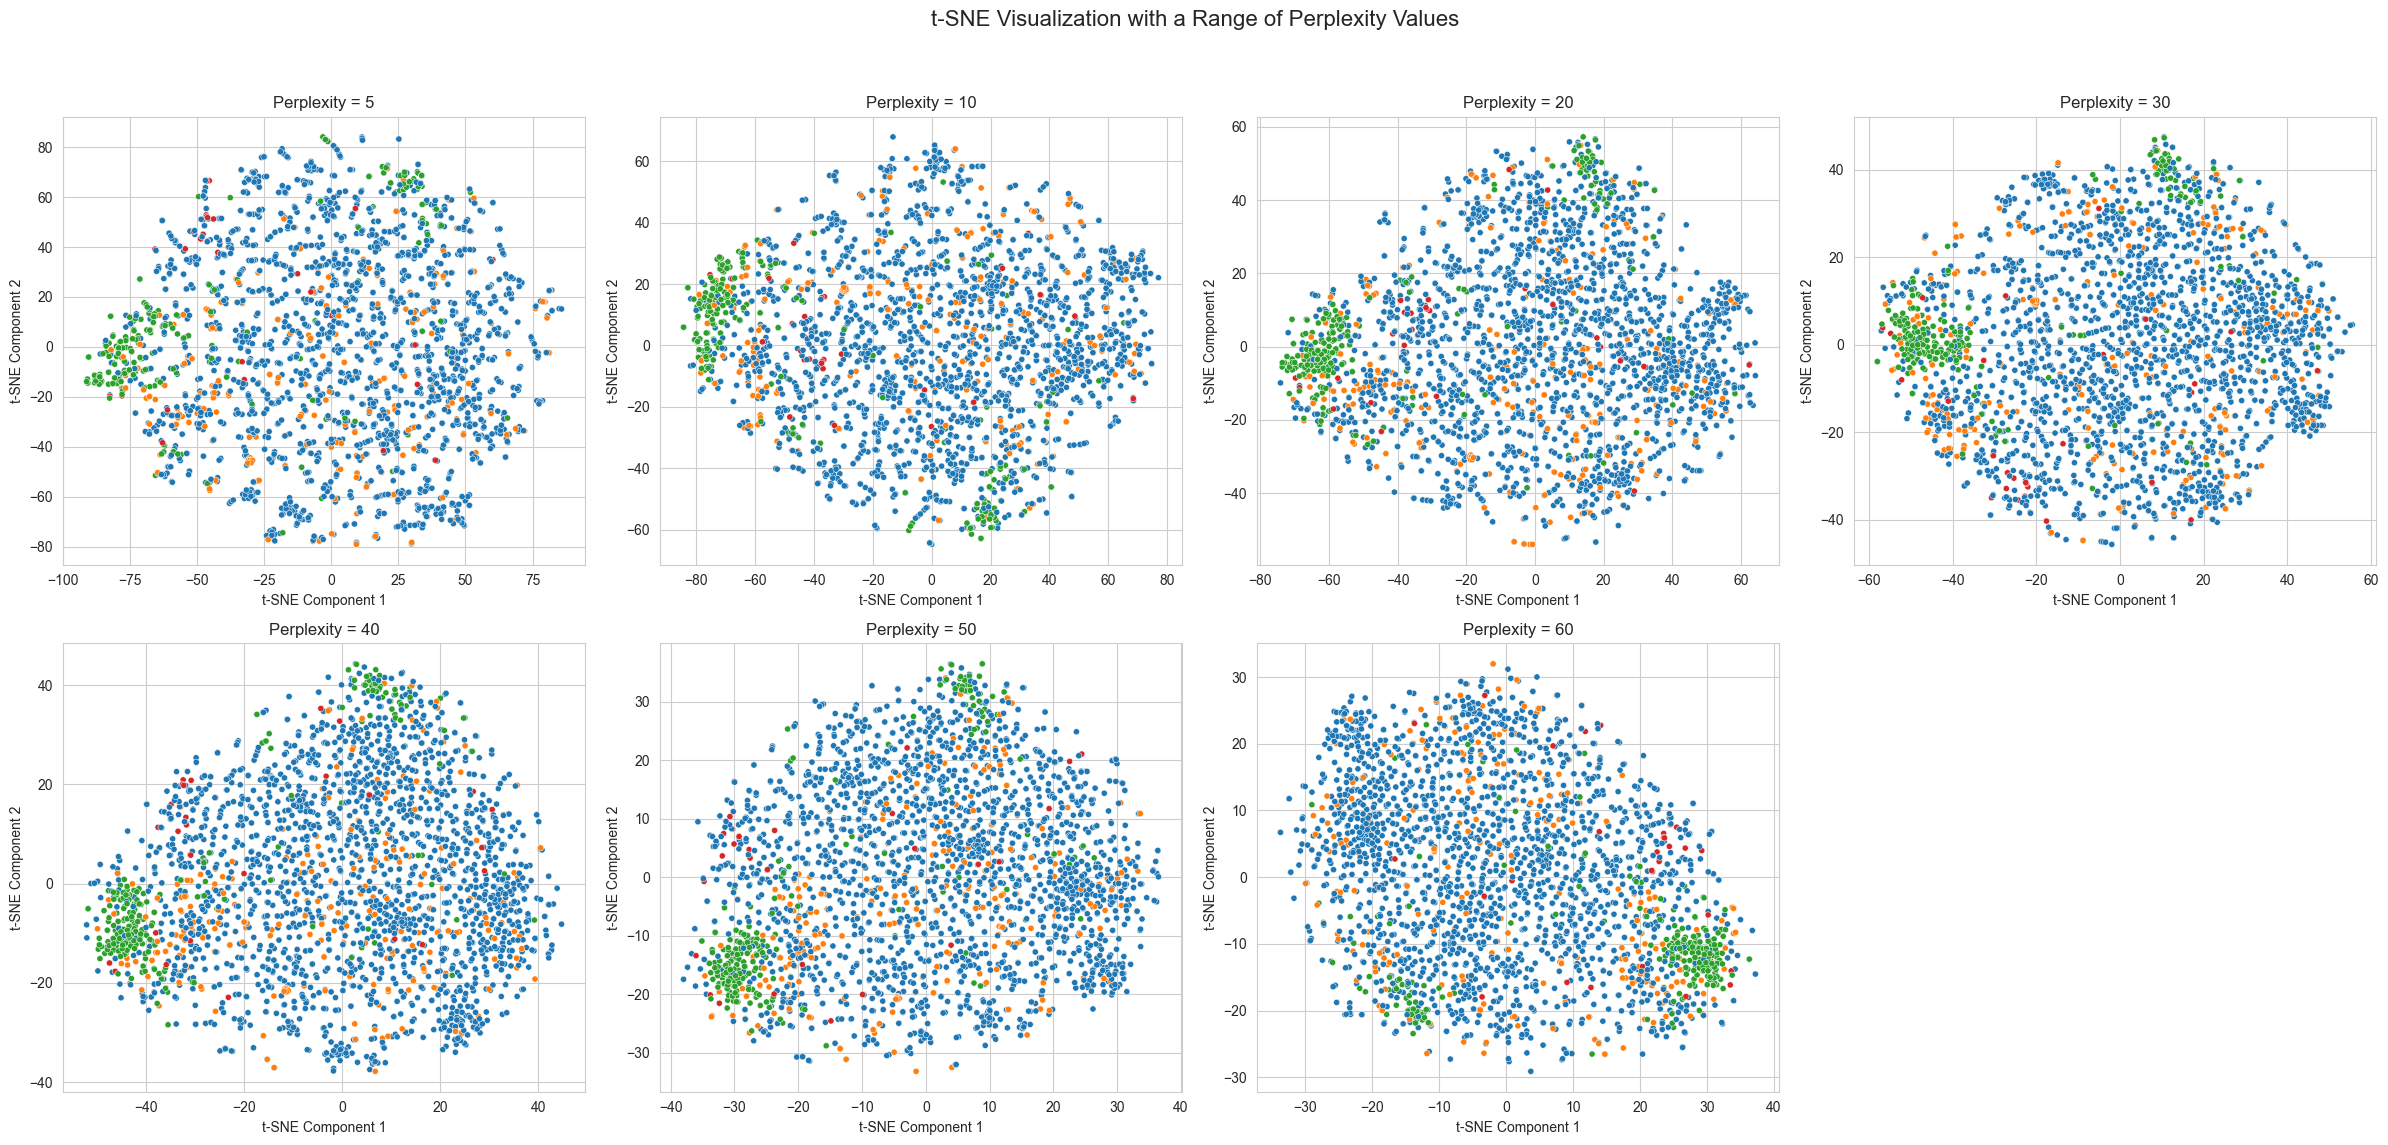

In [182]:
perplexities = [5, 10, 20, 30, 40, 50, 60]

nrows = 2
ncols = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(24, 12))
fig.suptitle('t-SNE Visualization with a Range of Perplexity Values', fontsize=16)

# Flatten the 2D array of axes into a 1D array.
axes = axes.flatten()

# 3. Loop through the list and generate a plot for each value
for i, perplexity in enumerate(perplexities):
    print(f"Running t-SNE for perplexity={perplexity}")
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, max_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)
    
    # Create a scatter plot on the corresponding subplot
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=color_labels, ax=axes[i], legend=False, s=20)
    axes[i].set_title(f'Perplexity = {perplexity}')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

fig.delaxes(axes[-1])

# Adjust layout 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Justification for Final Perplexity Choice (Comprehensive)

After experimenting with a wide range of perplexity values (including 5, 10, 20, 30, 40, and 50), a final choice can be made based on the clarity of the resulting visualizations.

* **Low Perplexities (e.g., 5, 10, 20):** These values tend to focus too heavily on the immediate local structure. The resulting plots often appear fragmented into many small, tight "islands," which may be capturing noise rather than revealing meaningful, broader relationships between the functional categories.

* **High Perplexities (e.g., 40, 50):** These higher values begin to prioritize the global structure. While this can be useful, the distinct shapes of individual clusters start to blend and merge, making it harder to distinguish between the primary groups we identified.

* **Optimal Balance (Perplexity = 30):** The perplexity value of **30** consistently provides the best balance. It reveals several well-formed, distinct clusters for our main categories while still arranging them in a way that suggests global relationships. It avoids the fragmentation of the lower values and the excessive blending of the higher values.

Therefore, based on this comprehensive experiment, **a perplexity of 30 is confirmed as the optimal choice** for the final analysis, as it yields the most clear and insightful visualization. 

## 2. Visualization

Now we will generate the final, large, and well-labeled 2D scatter plot using our chosen perplexity of 30.  This plot will serve as the basis for our data veracity inspection.

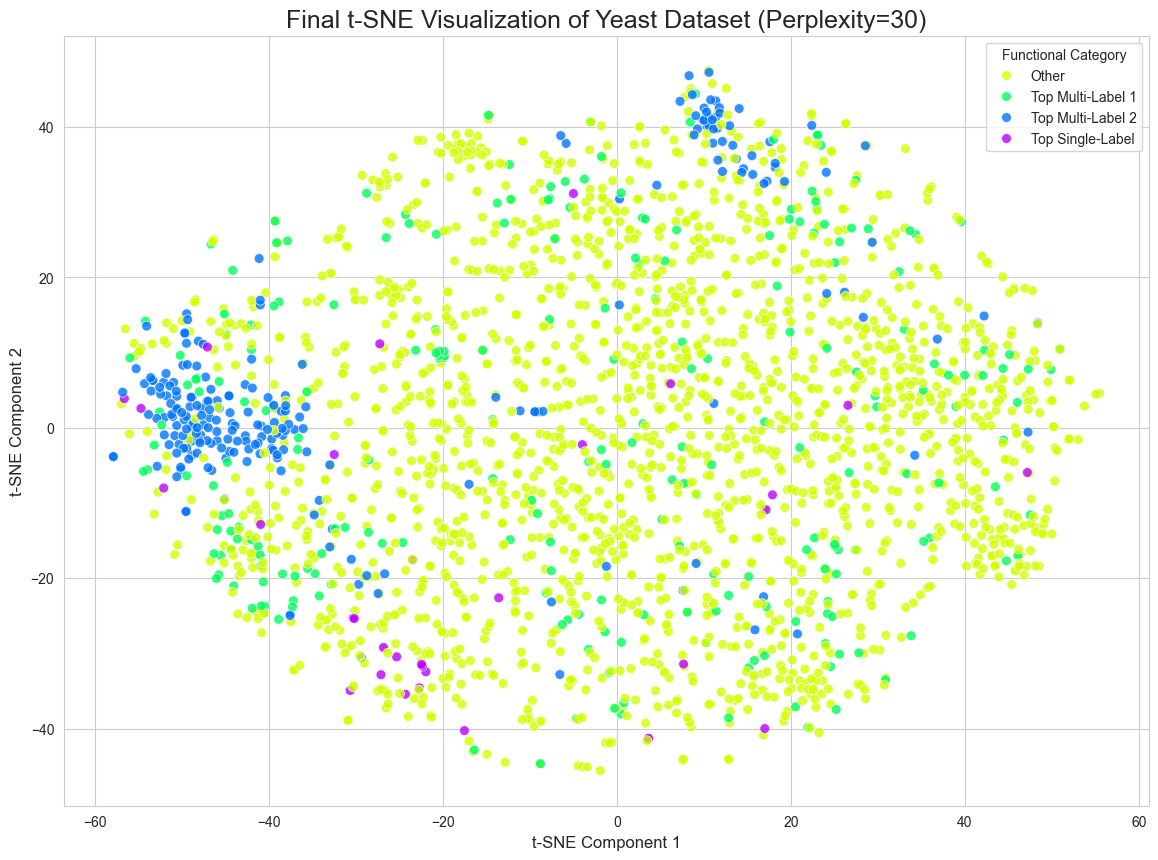

In [183]:
# Final t-SNE implementation with the chosen perplexity of 30
tsne_final = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
X_tsne_final = tsne_final.fit_transform(X_scaled)

# Create the final, large, and well-labeled 2D scatter plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=X_tsne_final[:, 0], 
    y=X_tsne_final[:, 1], 
    hue=color_labels, # Color points using our simplified categories 
    palette=sns.color_palette("hsv", 4),
    s=50,
    alpha=0.8
)
plt.title('Final t-SNE Visualization of Yeast Dataset (Perplexity=30)', fontsize=18)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Functional Category', fontsize=10)
plt.show()

## 3. Veracity Inspection

This t-SNE visualization is highly effective at exposing the data veracity challenges within the Yeast dataset. By inspecting the clusters using the correct color scheme, we can visually identify these issues:

1. **Noisy/Ambiguous Labels**
The plot clearly shows several points that appear to be "misplaced," suggesting noisy or ambiguous labels.

    - Observation: Look at the distinct clusters formed by "Top Multi-Label 1" (green) and "Top Multi-Label 2" (blue). Within the large green cluster on the left, you can see several blue points embedded. Similarly, the blue cluster on the right contains a few isolated green points.

    - Interpretation: These points represent experiments whose gene expression profiles are very similar to one group, but they are labeled as belonging to another. This could mean either the label is incorrect (a noisy label) or the gene's function genuinely overlaps with both categories, making them inherently ambiguous and hard to separate.

2. **Outliers**
There are multiple examples of outliers, which are points that are far removed from the main data groupings.

    - Observation: In the upper and lower regions of the plot, there are several isolated yellow/light greenish ("Other") points and tiny clusters detached from the main structures. Additionally, the small purple cluster ("Top Single-Label") at the very top is itself quite distant from the main multi-label groups.

    - Hypothesis: These outliers could represent several things:

    - Experimental Errors: The gene expression readings might have been skewed due to a failed or contaminated experiment.

    - Rare Biological Phenomena: These could be genuinely unique genes with highly unusual expression patterns that do not fit into the common functional categories.
A classifier would have a difficult time with these points and might either ignore them or overfit to them.

3. **Hard-to-Learn Samples**
The plot vividly illustrates regions where a classifier would struggle.

    - Observation: The large, central mass of points, dominated by the yellow/light greenish ("Other") category, is a perfect example of a hard-to-learn region. It forms a "bridge" between the green and blue clusters and shows significant mixing with both.

    - Explanation: A simple classifier works by finding a clean line or plane to separate classes. In this mixed central region, no such simple boundary exists. The high degree of class overlap means that many data points are statistically similar to points from different classes, which would lead to low confidence and a high rate of misclassification for any model trying to learn from this part of the data.

###  Quantitative analysis of data veracity issues

To move beyond visual inspection, we performed a quantitative analysis to numerically identify potential data quality issues within the 2D t-SNE embedding. The goal was to assign a numerical basis to our observations of noisy labels and outliers.

In [184]:
# 1. Quantify potential noisy labels by finding misplaced points
def find_potential_noisy_labels(X_embedded, color_labels, n_neighbors=10):
    """Find points that might have noisy labels based on their neighborhood"""
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(X_embedded)
    distances, indices = nbrs.kneighbors(X_embedded)
    
    suspicious_points = []
    for i, (neighbors, point_label) in enumerate(zip(indices, color_labels)):
        neighbor_labels = [color_labels[j] for j in neighbors[1:]]  # Exclude self
        # If most neighbors have different labels, this point might be noisy
        if neighbor_labels.count(point_label) < len(neighbor_labels) * 0.3:
            suspicious_points.append(i)
    
    return suspicious_points

# 2. Identify outliers using distance-based method
def find_outliers(X_embedded, percentile=95):
    """Find outliers based on distance from center"""
    center = np.mean(X_embedded, axis=0)
    distances = np.sqrt(np.sum((X_embedded - center)**2, axis=1))
    threshold = np.percentile(distances, percentile)
    outliers = np.where(distances > threshold)[0]
    return outliers

# Apply quantitative analysis
suspicious_labels = find_potential_noisy_labels(X_tsne_final, color_labels)
outlier_indices = find_outliers(X_tsne_final)

print(f"Quantitative Analysis Results:")
print(f"- Potentially noisy/ambiguous labels: {len(suspicious_labels)} points ({len(suspicious_labels)/len(color_labels)*100:.1f}%)")
print(f"- Statistical outliers: {len(outlier_indices)} points ({len(outlier_indices)/len(color_labels)*100:.1f}%)")
print(f"- Overlap between suspicious and outlier points: {len(set(suspicious_labels) & set(outlier_indices))} points")

# Distribution of suspicious labels by category
suspicious_categories = [color_labels[i] for i in suspicious_labels]
print(f"\nDistribution of potentially noisy labels:")
for category in set(color_labels):
    count = suspicious_categories.count(category)
    total = color_labels.count(category)
    print(f"- {category}: {count}/{total} ({count/total*100:.1f}%)")

Quantitative Analysis Results:
- Potentially noisy/ambiguous labels: 293 points (12.1%)
- Statistical outliers: 121 points (5.0%)
- Overlap between suspicious and outlier points: 26 points

Distribution of potentially noisy labels:
- Top Multi-Label 2: 52/233 (22.3%)
- Other: 31/1915 (1.6%)
- Top Multi-Label 1: 179/237 (75.5%)
- Top Single-Label: 31/32 (96.9%)


The quantitative analysis strongly validates our initial visual findings and provides deeper insights:

- **Potentially Noisy/Ambiguous Labels (12.1% of data)**:
The k-Nearest Neighbors method flagged 293 points as potentially noisy. The breakdown by category is particularly revealing:

    - **Top Single-Label (96.9% suspicious)**: This extremely high percentage is a fascinating result. Visually, this group forms a small, tight, but isolated cluster. In the 2D space, its nearest neighbors are almost exclusively from the "Other" or "Top Multi-Label" clusters. The algorithm flags these points not because the labels are necessarily wrong, but because the cluster is so distinct and far from points of its own kind that its neighborhood is dominated by other labels. This numerically confirms its isolation.

    - **Top Multi-Label 1 (75.5% suspicious)**: This high value provides strong quantitative evidence for the "hard-to-learn" regions. It confirms our visual observation that this cluster is heavily intermingled with other categories, especially "Top Multi-Label 2" and "Other". Points in this group frequently have neighbors with different labels, making the decision boundary for a classifier highly ambiguous.

    - **Other (1.6% suspicious)**: This percentage is surprisingly low. This is an artifact of our method: since the "Other" category is the vast majority, any point labeled "Other" is statistically very likely to have neighbors that are also "Other," and thus it won't be flagged as suspicious by this algorithm, even if it lies in a visually messy region.

- **Statistical Outliers (5.0% of data)**:
The distance-based method identified 121 points as statistical outliers. This numerically confirms our visual identification of the isolated points and tiny, distant clusters scattered at the edges of the plot. These points are mathematically the furthest from the main data distribution.

- **Overlap (26 points)**:
There are 26 points that are identified as both potentially noisy and statistical outliers. These are the most problematic data points in the dataset. They are not only far from the main distribution but also reside in neighborhoods where their label is inconsistent. These points would be prime candidates for manual review in a real-world scenario, as they could represent significant experimental errors, rare events, or critical misclassifications.

# Part C: Isomap and Manifold Learning

## 1. Isomap Implementation

The fundamental difference between Isomap and t-SNE lies in what aspect of the data structure they aim to preserve:

- **t-SNE (Local Preservation)**: t-SNE is a probabilistic method that focuses on preserving local neighborhoods. Its primary goal is to ensure that points that are close to each other in the high-dimensional space remain close in the low-dimensional embedding. It excels at revealing the fine-grained cluster structure of the data but can distort the global geometry (the distances between far-apart clusters may not be meaningful).

- **Isomap (Global Preservation)**: Isomap is a manifold learning technique that aims to preserve the global geodesic distances between all points. It models the data as lying on a lower-dimensional manifold and calculates the shortest path between points along this manifold, rather than the straight-line Euclidean distance. This makes Isomap excellent at "unfolding" large, continuous structures (like a Swiss roll) and revealing the overall global shape of the data, though it may not separate local clusters as distinctly as t-SNE.

In [185]:
# Isomap Implementation
isomap = Isomap(n_components=2, n_neighbors=5) # n_neighbors is a key parameter, 5 is a common default
X_isomap = isomap.fit_transform(X_scaled)

## 2. Visualization

This cell generates the 2D scatter plot for the Isomap embedding. We use the exact same coloring scheme (color_labels) that was used for the t-SNE plot. This consistency is crucial as it allows for a direct and fair comparison between the two dimensionality reduction techniques, enabling us to analyze how each method represents the structure of the data differently.

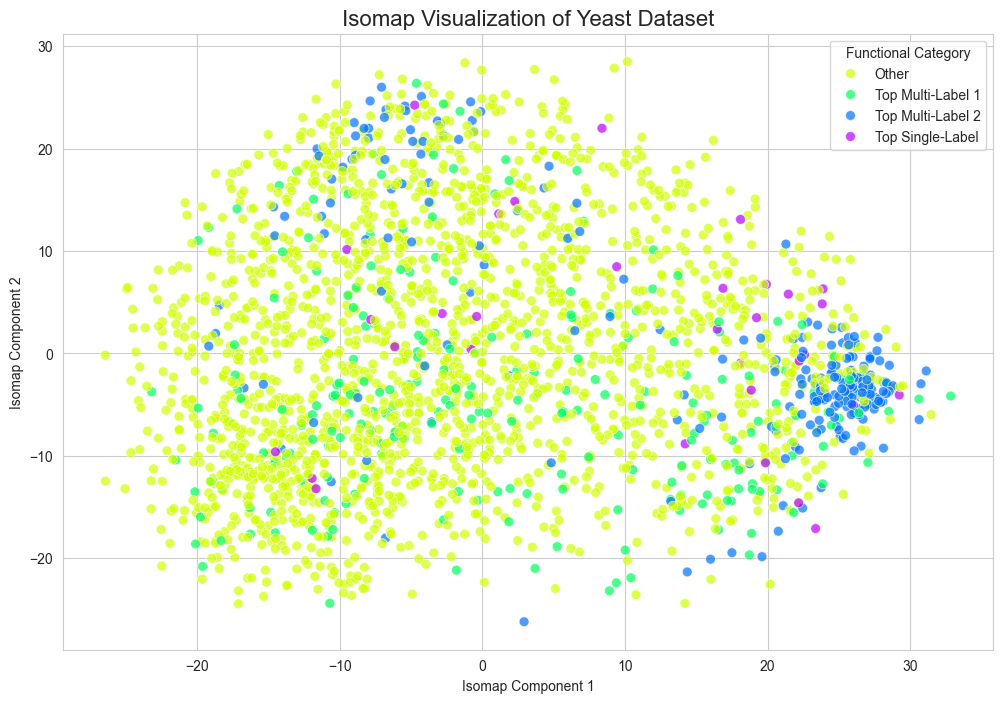

In [186]:
# Create the 2D scatter plot of the Isomap coordinates
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_isomap[:, 0], 
    y=X_isomap[:, 1], 
    hue=color_labels,
    palette=sns.color_palette("hsv", 4),
    s=50,
    alpha=0.7
)
plt.title('Isomap Visualization of Yeast Dataset', fontsize=16)
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.legend(title='Functional Category')
plt.show()

This Isomap visualization provides a complementary perspective to the t-SNE plot, focusing more on the global structure of the data rather than local clusters.

#### 3. Comparison of Visualizations
When comparing the Isomap visualization to the t-SNE plot, the different priorities of the algorithms become clear.

- **t-SNE** excels at showing **local structure**, creating tight, well-separated clusters. This is very useful for identifying distinct groups and potential outliers.


- **Isomap**, on the other hand, is better at revealing the **global structure** of the gene expression data. Instead of tight clusters, it displays the data as a more continuous, unfolded structure. This gives a more faithful representation of the overall "shape" of the data and how the major categories relate to one another on a larger scale.

#### Discussion of the Data Manifold and Classification Difficulty
The concept of the **data manifold** is the idea that the high-dimensional gene expression data actually lies on a lower-dimensional, curved surface embedded within the 103-dimensional space. Isomap attempts to "unroll" this surface to view its intrinsic geometry.

- The Isomap plot suggests that the Yeast dataset resides on a **highly curved and complex manifold**. The data does not form a simple spherical cloud; instead, it forms an elongated and somewhat twisted structure.

- The complexity of this manifold is directly related to the **difficulty of classification**. A simple, flat manifold would imply that the different functional categories could be separated by linear decision boundaries (like a straight line or plane). However, the curved manifold seen here indicates that the classes are intertwined in a complex, non-linear way. This is a key reason why a simple classifier would struggle, and why more advanced, non-linear models would be necessary to learn the intricate boundaries required for accurate classification on this dataset.